# **1. Web Scraping code**

In [6]:
# Data is available only for 20 pages data shows.
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd

# Set up the WebDriver
driver = webdriver.Chrome()
driver.maximize_window()

# List of URLs and their corresponding product names
urls = [
    {"url": "https://www.flipkart.com/samsung-galaxy-s21-fe-5g-snapdragon-888-olive-256-gb/product-reviews/itmb3a0b1e650a0e?pid=MOBGSXD7TZZTJQXE&lid=LSTMOBGSXD7TZZTJQXEJGKZMP&sortOrder=MOST_HELPFUL&certifiedBuyer=false&aid=overall", "product_name": "Samsung Galaxy S21 FE"},
    {"url": "https://www.flipkart.com/google-pixel-7-obsidian-128-gb/product-reviews/itm45d75002be0e7?pid=MOBGHW44NHFZJN6N&lid=LSTMOBGHW44NHFZJN6NCVAFHP&marketplace=FLIPKART", "product_name": "Google Pixel 7"},
    {"url": "https://www.flipkart.com/nothing-phone-2-dark-grey-256-gb/product-reviews/itmc1490711c3eb9?pid=MOBGZSDKU5CGE8FX&lid=LSTMOBGZSDKU5CGE8FXFDQPQN&marketplace=FLIPKART", "product_name": "Nothing Phone (2)"},
    {"url": "https://www.flipkart.com/oneplus-11r-5g-sonic-black-256-gb/product-reviews/itmd8344a066fd54?pid=MOBGN3AUFRGVERFB&lid=LSTMOBGN3AUFRGVERFBXVHDHS&marketplace=FLIPKART", "product_name": "OnePlus 11R"},
    {"url": "https://www.flipkart.com/realme-12-pro-5g-submarine-blue-128-gb/product-reviews/itm7f042fb6aebdb?pid=MOBGWH8SR7MRR68W&lid=LSTMOBGWH8SR7MRR68WAOGAEA&marketplace=FLIPKART", "product_name": "Realme 12 Pro+"},
    {"url": "https://www.flipkart.com/samsung-galaxy-s23-5g-cream-128-gb/product-reviews/itmc77ff94cdf044?pid=MOBGMFFX5XYE8MZN&lid=LSTMOBGMFFX5XYE8MZNRGKCA5&marketplace=FLIPKART", "product_name": "SAMSUNG Galaxy S23 5G"},
    {"url": "https://www.flipkart.com/motorola-edge-40-eclipse-black-256-gb/product-reviews/itmbe5b18bf1f229?pid=MOBGKHNBY3JZJHTB&lid=LSTMOBGKHNBY3JZJHTB0I8TCJ&marketplace=FLIPKART", "product_name": "Motorola Edge 40"}
]

def scroll_down_page():
    scrolling = True
    while scrolling:
        old_page_source = driver.page_source
        body = driver.find_element(By.TAG_NAME, "body")
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(9)  # Wait for the page to load
        new_page_source = driver.page_source
        if new_page_source == old_page_source:  # Stop scrolling if no new content is loaded
            scrolling = False

def scrape_reviews(product_name, product_id):
    reviews_data = []
    try:
        time.sleep(9)  # Wait for the page to load
        scroll_down_page()

        # Extract reviews, ratings, and one-word reviews
        review_elements = driver.find_elements(By.CLASS_NAME, "ZmyHeo")
        rating_elements = driver.find_elements(By.CLASS_NAME, "XQDdHH.Ga3i8K")
        one_word_review_elements = driver.find_elements(By.CLASS_NAME, "z9E0IG")

        for i in range(min(len(review_elements), len(rating_elements), len(one_word_review_elements))):
            review = review_elements[i].text
            rating = rating_elements[i].text
            one_word_review = one_word_review_elements[i].text
            reviews_data.append([review, rating, one_word_review, product_name, product_id])
    except Exception as e:
        print(f"Error while scraping reviews for {product_name}: {e}")
    
    return reviews_data

def go_to_page(page_number):
    try:
        page_xpath = f'//a[text()="{page_number}"]'
        page_button = driver.find_element(By.XPATH, page_xpath)
        page_button.click()
        time.sleep(9)  # Wait for the next page to load
    except Exception as e:
        print(f"Error while navigating to page {page_number}: {e}")
        return False
    return True

# Main function to scrape all URLs
all_reviews_data = []
for product in urls:
    product_url = product['url']
    product_name = product['product_name']
    product_id = product_url.split('pid=')[1].split('&')[0]  # Extract product ID from URL
    print(f"Scraping reviews for {product_name} (Product ID: {product_id})")

    # Load the page
    driver.get(product_url)
    time.sleep(9)
    
    # Scrape multiple pages (from pages 1 to 21)
    for page in range(1, 21):
        print(f"Scraping page {page} for {product_name}")
        all_reviews_data.extend(scrape_reviews(product_name, product_id))
        
        if page < 21:  # Only navigate to the next page if not on the last one
            if not go_to_page(page + 1):
                break

# Save all scraped data to a CSV file using Pandas
df = pd.DataFrame(all_reviews_data, columns=['Product Name', 'Product ID', 'Rating', 'One-word Review', 'Review' ])
df.to_csv('Flipkart_Multi_Product_Reviews.csv', index=False)

print("Scraping completed successfully, data saved to Flipkart_Multi_Product_Reviews.csv")

# Close the browser
driver.quit()

Scraping reviews for Samsung Galaxy S21 FE (Product ID: MOBGSXD7TZZTJQXE)
Scraping page 1 for Samsung Galaxy S21 FE
Scraping page 2 for Samsung Galaxy S21 FE
Scraping page 3 for Samsung Galaxy S21 FE
Scraping page 4 for Samsung Galaxy S21 FE
Scraping page 5 for Samsung Galaxy S21 FE
Scraping page 6 for Samsung Galaxy S21 FE
Scraping page 7 for Samsung Galaxy S21 FE
Scraping page 8 for Samsung Galaxy S21 FE
Scraping page 9 for Samsung Galaxy S21 FE
Scraping page 10 for Samsung Galaxy S21 FE
Scraping page 11 for Samsung Galaxy S21 FE
Scraping page 12 for Samsung Galaxy S21 FE
Scraping page 13 for Samsung Galaxy S21 FE
Scraping page 14 for Samsung Galaxy S21 FE
Scraping page 15 for Samsung Galaxy S21 FE
Scraping page 16 for Samsung Galaxy S21 FE
Scraping page 17 for Samsung Galaxy S21 FE
Scraping page 18 for Samsung Galaxy S21 FE
Scraping page 19 for Samsung Galaxy S21 FE
Scraping page 20 for Samsung Galaxy S21 FE
Scraping page 21 for Samsung Galaxy S21 FE
Error while navigating to page 2

In [7]:
# Flipkart_Multi_Product_Reviews files reading here.
df = pd.read_csv("Flipkart_Multi_Product_Reviews.csv")
df

,Product Name,Product ID,Rating,One-word Review,Review
0,Reviewing after one month use\nNice and handy ...,5,Great product,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
1,"It is a great mobile, its camera is exactly li...",5,Must buy!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
2,Using since last 10 days and super happy with ...,5,Awesome,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
3,I personally buy this phone for camera it is g...,5,Excellent,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
4,Best camera.\nSuper display.\nIP 68 rating.\n3...,5,Perfect product!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
...,...,...,...,...,...
997,Nice mobile ❤️❤️,5,Highly recommended,Motorola Edge 40,MOBGKHNBY3JZJHTB
998,Slim and nice pH and osm camera and looking fo...,4,Nice product,Motorola Edge 40,MOBGKHNBY3JZJHTB
999,Mobile display was very weak broken in 10 day ...,1,Not recommended at all,Motorola Edge 40,MOBGKHNBY3JZJHTB
1000,This is an excellent device from Motorola. I r...,4,Value-for-money,Motorola Edge 40,MOBGKHNBY3JZJHTB


# **2. Data Structuring and Cleaning.**

## **2.1 Data create_report.**

In [1]:
# Data create_report

# This code will show me how data is then in a CSV file & what I need to do will give some basic reports.
# After restart session not to do it again.

# pip install dataprep
# from dataprep.eda import create_report
# create_report(df)

## **2.2 Data Structuring and Cleaning.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# merged files reading here.
df = pd.read_csv("Flipkart_Multi_Product_Reviews.csv")
df

,Review,Rating,One-word Review,Product Name,Product ID
0,Reviewing after one month use\nNice and handy ...,5,Great product,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
1,"It is a great mobile, its camera is exactly li...",5,Must buy!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
2,Using since last 10 days and super happy with ...,5,Awesome,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
3,I personally buy this phone for camera it is g...,5,Excellent,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
4,Best camera.\nSuper display.\nIP 68 rating.\n3...,5,Perfect product!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
...,...,...,...,...,...
997,Nice mobile ❤️❤️,5,Highly recommended,Motorola Edge 40,MOBGKHNBY3JZJHTB
998,Slim and nice pH and osm camera and looking fo...,4,Nice product,Motorola Edge 40,MOBGKHNBY3JZJHTB
999,Mobile display was very weak broken in 10 day ...,1,Not recommended at all,Motorola Edge 40,MOBGKHNBY3JZJHTB
1000,This is an excellent device from Motorola. I r...,4,Value-for-money,Motorola Edge 40,MOBGKHNBY3JZJHTB


In [3]:
df.head()

,Review,Rating,One-word Review,Product Name,Product ID
0,Reviewing after one month use\nNice and handy ...,5,Great product,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
1,"It is a great mobile, its camera is exactly li...",5,Must buy!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
2,Using since last 10 days and super happy with ...,5,Awesome,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
3,I personally buy this phone for camera it is g...,5,Excellent,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
4,Best camera.\nSuper display.\nIP 68 rating.\n3...,5,Perfect product!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE


In [4]:
df.shape   # len(df)

(1002, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1002 non-null   object
 1   Rating           1002 non-null   int64 
 2   One-word Review  1002 non-null   object
 3   Product Name     1002 non-null   object
 4   Product ID       1002 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.3+ KB


In [6]:
df.isna().sum()

Review             0
Rating             0
One-word Review    0
Product Name       0
Product ID         0
dtype: int64

In [7]:
df.duplicated().sum()
# df.drop_duplicates(inplace=True)

26

In [8]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

                                                Review  Rating  \
105  Best camera phone\nAvg battery\nBest performan...       5   
117                                        Good camera       5   
223  Best smartphone in this price range with good ...       5   
246  Awesome camera, good design, flawless performa...       5   
256  Loved photograph mainly autofocus and details ...       5   
283  Overall value for money camera is just another...       4   
418  It's really smooth and cool to use.\nPerforman...       5   
522                                         Nice phone       5   
536                                        Excellent 👍       5   
574                                        Good Phone.       4   
580                        Nice phone good performance       5   
582  Battery will not stand at list 5 hours\nBatter...       5   
592                                 My favourite brand       5   
597                                              Ok ok       5   
706  1.The

In [9]:
# Duplicate is there so copying data into df1
df1 = df.copy()

In [10]:
df1.drop_duplicates(inplace=True)

In [11]:
df1.duplicated().sum()

0

In [12]:
Unique_product_ids = df1['Product ID'].unique()
Unique_product_ids

array(['MOBGSXD7TZZTJQXE', 'MOBGHW44NHFZJN6N', 'MOBGZSDKU5CGE8FX',
       'MOBGN3AUFRGVERFB', 'MOBGWH8SR7MRR68W', 'MOBGMFFX5XYE8MZN',
       'MOBGKHNBY3JZJHTB'], dtype=object)

In [13]:
Unique_product_names = df1['Product Name'].unique()
Unique_product_names

array(['Samsung Galaxy S21 FE', 'Google Pixel 7', 'Nothing Phone (2)',
       'OnePlus 11R', 'Realme 12 Pro+', 'SAMSUNG Galaxy S23 5G',
       'Motorola Edge 40'], dtype=object)

## **2.3 Data Transformation**

In [14]:
df.Rating.value_counts()

Rating
5    719
4    223
3     41
1     14
2      5
Name: count, dtype: int64

In [15]:
# Checking any blank cell is there using space "  "
blank=[]
for i,j,k,l,m,n in df1.itertuples():
  if type(j)==str:
    if j.isspace():
      blank.append(i)

In [16]:
df1.loc[blank]

,Review,Rating,One-word Review,Product Name,Product ID


In [17]:
# finding str length below 10 count
Word_Length=[]
for i,j,k,l,m,n in df1.itertuples():
  if type(j)==str:
    if len(j)<10:
      Word_Length.append(i)

In [18]:
df1.loc[Word_Length]

,Review,Rating,One-word Review,Product Name,Product ID
9,Smooth,5,Just wow!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
12,Super,4,Really Nice,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
13,Very Nice,5,Super!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
57,Awesome 👌,5,Terrific,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
191,Amazing,5,Brilliant,Google Pixel 7,MOBGHW44NHFZJN6N
244,Unique,5,Terrific,Google Pixel 7,MOBGHW44NHFZJN6N
392,Good,5,Terrific,Nothing Phone (2),MOBGZSDKU5CGE8FX
424,Amazing 😍,5,Simply awesome,OnePlus 11R,MOBGN3AUFRGVERFB
438,Nice one,4,Good choice,OnePlus 11R,MOBGN3AUFRGVERFB
449,Very good,5,Perfect product!,OnePlus 11R,MOBGN3AUFRGVERFB


In [19]:
len(Word_Length)

37

In [20]:
# I deleted duplicated 30 values so reset_index inclination.
df1.reset_index(drop=True, inplace=True)

In [21]:
# Function to clean text (remove unwanted characters)
def clean_text(text):
    text = text.replace('\\', ' ')  # Replace backslashes
    text = text.replace('\n', ' ')  # Replace newline characters
    text = text.replace('\n\n', ' ')  # Replace multiple newlines
    return text.strip()

# # Load the data into a DataFrame (replace 'your_data.csv' with your actual file)
# df1 = pd.read_csv('Flipkart_data.csv')

# Apply the clean_text function to a specific column (replace 'text_column' with your actual column name)
df1['Review'] = df1['Review'].apply(clean_text)

# Show the cleaned DataFrame
print(df1[['Review']])

# Save the cleaned data to a new CSV file
df1.to_csv('Flipkart_cleaned_data.csv', index=False)

                                                Review
0    Reviewing after one month use Nice and handy p...
1    It is a great mobile, its camera is exactly li...
2    Using since last 10 days and super happy with ...
3    I personally buy this phone for camera it is g...
4    Best camera. Super display. IP 68 rating. 3 yr...
..                                                 ...
971                                   Nice mobile ❤️❤️
972  Slim and nice pH and osm camera and looking fo...
973  Mobile display was very weak broken in 10 day ...
974  This is an excellent device from Motorola. I r...
975             Camera and motorola servicing very bad

[976 rows x 1 columns]


In [22]:
df1

,Review,Rating,One-word Review,Product Name,Product ID
0,Reviewing after one month use Nice and handy p...,5,Great product,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
1,"It is a great mobile, its camera is exactly li...",5,Must buy!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
2,Using since last 10 days and super happy with ...,5,Awesome,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
3,I personally buy this phone for camera it is g...,5,Excellent,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
4,Best camera. Super display. IP 68 rating. 3 yr...,5,Perfect product!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
...,...,...,...,...,...
971,Nice mobile ❤️❤️,5,Highly recommended,Motorola Edge 40,MOBGKHNBY3JZJHTB
972,Slim and nice pH and osm camera and looking fo...,4,Nice product,Motorola Edge 40,MOBGKHNBY3JZJHTB
973,Mobile display was very weak broken in 10 day ...,1,Not recommended at all,Motorola Edge 40,MOBGKHNBY3JZJHTB
974,This is an excellent device from Motorola. I r...,4,Value-for-money,Motorola Edge 40,MOBGKHNBY3JZJHTB


In [23]:
# To display full column width.
pd.set_option('display.max_colwidth', None)
df1

,Review,Rating,One-word Review,Product Name,Product ID
0,Reviewing after one month use Nice and handy phone with 6.4 display Compact size. Camera 📷 is mind blowing 🔥🔥 Battery life is ok Display is amazing with victous glass protection which is best in market For normal use its a best phone with amazing features and customisation,5,Great product,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
1,"It is a great mobile, its camera is exactly like a flagship, can not get a better mobile in this range.",5,Must buy!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
2,"Using since last 10 days and super happy with the purchase, also prompt delivery by flipkart,what an amazing camera,display and lovely one UI,received immediate android 13 one UI 5 update,overall happy and satisfied with my purchase.",5,Awesome,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
3,I personally buy this phone for camera it is good but sometimes feeling need more optimisation and battery performance also good when we get refresh rate at standard it will go for long day 120 hz can drain ur battery easily and display is also very good sound was dolby atmos was very good soo finally experiencing flagship samsung mobile haptic feedback is also nice now slowly felling love with this mobile,5,Excellent,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
4,Best camera. Super display. IP 68 rating. 3 yrs Android updates. A good all rounder mobile. But missing fast charging compare with other mobiles in this price segment. It's ok for me.,5,Perfect product!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
...,...,...,...,...,...
971,Nice mobile ❤️❤️,5,Highly recommended,Motorola Edge 40,MOBGKHNBY3JZJHTB
972,Slim and nice pH and osm camera and looking for osm ❤❤❤,4,Nice product,Motorola Edge 40,MOBGKHNBY3JZJHTB
973,Mobile display was very weak broken in 10 day nd not working,1,Not recommended at all,Motorola Edge 40,MOBGKHNBY3JZJHTB
974,This is an excellent device from Motorola. I replaced the Samsung M51 (7000mah battery) with this mobile so the battery is definitely one area of concern to me. To prevent battery drainage I am using 60hz refresh rate which is equally good to the eyes.The other small issue is the mobile gets a little heated up while charging or heavy usage. Rest all are of excellent quality and can compete with any premium Android mobile phones in the market.This feedback has been provided after 11 days of ex... READ MORE,4,Value-for-money,Motorola Edge 40,MOBGKHNBY3JZJHTB


In [24]:
# Finding Emojis.
import re

def find_emojis(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.findall(text)

# Assuming 'df' is your DataFrame and 'review' is the column containing reviews
df1['emojis'] = df1['Review'].apply(find_emojis)

In [25]:
df1['emojis']

0      [📷, 🔥🔥]
1           []
2           []
3           []
4           []
        ...   
971     [❤️❤️]
972      [❤❤❤]
973         []
974         []
975         []
Name: emojis, Length: 976, dtype: object

In [26]:
df1.emojis.value_counts()

emojis
[]              763
[😍]              17
[❤️]             13
[👍]              13
[👌]              12
               ... 
[✅, ✅, ❌, 👌]      1
[😭😭]              1
[💕]               1
[😝]               1
[❤❤❤]             1
Name: count, Length: 115, dtype: int64

In [27]:
df1.drop('emojis', axis=1, inplace=True)

In [28]:
# Cleaning the Review Text
def find_and_remove_emojis(text): 
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

# Assuming 'df' is your DataFrame and 'Review' is the column containing reviews
df1['Review'] = df1['Review'].apply(find_and_remove_emojis)

df1

,Review,Rating,One-word Review,Product Name,Product ID
0,Reviewing after one month use Nice and handy phone with 6.4 display Compact size. Camera is mind blowing Battery life is ok Display is amazing with victous glass protection which is best in market For normal use its a best phone with amazing features and customisation,5,Great product,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
1,"It is a great mobile, its camera is exactly like a flagship, can not get a better mobile in this range.",5,Must buy!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
2,"Using since last 10 days and super happy with the purchase, also prompt delivery by flipkart,what an amazing camera,display and lovely one UI,received immediate android 13 one UI 5 update,overall happy and satisfied with my purchase.",5,Awesome,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
3,I personally buy this phone for camera it is good but sometimes feeling need more optimisation and battery performance also good when we get refresh rate at standard it will go for long day 120 hz can drain ur battery easily and display is also very good sound was dolby atmos was very good soo finally experiencing flagship samsung mobile haptic feedback is also nice now slowly felling love with this mobile,5,Excellent,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
4,Best camera. Super display. IP 68 rating. 3 yrs Android updates. A good all rounder mobile. But missing fast charging compare with other mobiles in this price segment. It's ok for me.,5,Perfect product!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE
...,...,...,...,...,...
971,Nice mobile,5,Highly recommended,Motorola Edge 40,MOBGKHNBY3JZJHTB
972,Slim and nice pH and osm camera and looking for osm,4,Nice product,Motorola Edge 40,MOBGKHNBY3JZJHTB
973,Mobile display was very weak broken in 10 day nd not working,1,Not recommended at all,Motorola Edge 40,MOBGKHNBY3JZJHTB
974,This is an excellent device from Motorola. I replaced the Samsung M51 (7000mah battery) with this mobile so the battery is definitely one area of concern to me. To prevent battery drainage I am using 60hz refresh rate which is equally good to the eyes.The other small issue is the mobile gets a little heated up while charging or heavy usage. Rest all are of excellent quality and can compete with any premium Android mobile phones in the market.This feedback has been provided after 11 days of ex... READ MORE,4,Value-for-money,Motorola Edge 40,MOBGKHNBY3JZJHTB


# **3. Sentiment Analysis [Positive, Negative, Neutral] - [NLP]**

## **3.1 Sentiment analysis using Vader lexicon Sentiment**

In [29]:
# pip install nlp
# pip install nltk
# Tokenizing and normalizing review texts for sentiment analysis.

In [30]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aravi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Add sentiment scores to the DataFrame
df1['Sentiment_Score'] = df1['Review'].apply(lambda x: sia.polarity_scores (str(x)))

# Optional: You can classify the sentiments as Positive, Negative, or Neutral
def compound(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification to the sentiment column
df1['compound'] = df1['Sentiment_Score'].apply(lambda x:x["compound"])
df1['vader_lexicon_Sentiment'] = df1['compound'].apply(compound)  # Then categorize the sentiment

# Save the updated DataFrame to a new CSV file
df1.to_csv('Flipkart_cleaned_mobile_data_reviews_with_sentiment_VL.csv', index=False)

In [32]:
# get_sentiment_score(text): This function calculates and returns the compound sentiment score for each text. The compound score is a normalized
# metric ranging from -1 (most negative) to 1 (most positive).

# Compound Score Interpretation:
#     1. -1 to -0.05: Negative sentiment
#     2. -0.05 to 0.05: Neutral sentiment
#     3. 0.05 to 1: Positive sentiment

# After converting into sentiment analyzing using vader_lexicon

# Analyze each text and print the sentiment scores
# for text in df1.Review:
#     sentiment_scores = sia.polarity_scores(text)
#     print(f"Text: {text}")
#     print(f"Sentiment Scores: {sentiment_scores}\n")

df1

,Review,Rating,One-word Review,Product Name,Product ID,Sentiment_Score,compound,vader_lexicon_Sentiment
0,Reviewing after one month use Nice and handy phone with 6.4 display Compact size. Camera is mind blowing Battery life is ok Display is amazing with victous glass protection which is best in market For normal use its a best phone with amazing features and customisation,5,Great product,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE,"{'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.9682}",0.9682,Positive
1,"It is a great mobile, its camera is exactly like a flagship, can not get a better mobile in this range.",5,Must buy!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE,"{'neg': 0.099, 'neu': 0.574, 'pos': 0.328, 'compound': 0.6802}",0.6802,Positive
2,"Using since last 10 days and super happy with the purchase, also prompt delivery by flipkart,what an amazing camera,display and lovely one UI,received immediate android 13 one UI 5 update,overall happy and satisfied with my purchase.",5,Awesome,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE,"{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.9709}",0.9709,Positive
3,I personally buy this phone for camera it is good but sometimes feeling need more optimisation and battery performance also good when we get refresh rate at standard it will go for long day 120 hz can drain ur battery easily and display is also very good sound was dolby atmos was very good soo finally experiencing flagship samsung mobile haptic feedback is also nice now slowly felling love with this mobile,5,Excellent,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9865}",0.9865,Positive
4,Best camera. Super display. IP 68 rating. 3 yrs Android updates. A good all rounder mobile. But missing fast charging compare with other mobiles in this price segment. It's ok for me.,5,Perfect product!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE,"{'neg': 0.074, 'neu': 0.665, 'pos': 0.261, 'compound': 0.7184}",0.7184,Positive
...,...,...,...,...,...,...,...,...
971,Nice mobile,5,Highly recommended,Motorola Edge 40,MOBGKHNBY3JZJHTB,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}",0.4215,Positive
972,Slim and nice pH and osm camera and looking for osm,4,Nice product,Motorola Edge 40,MOBGKHNBY3JZJHTB,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}",0.4215,Positive
973,Mobile display was very weak broken in 10 day nd not working,1,Not recommended at all,Motorola Edge 40,MOBGKHNBY3JZJHTB,"{'neg': 0.397, 'neu': 0.603, 'pos': 0.0, 'compound': -0.763}",-0.7630,Negative
974,This is an excellent device from Motorola. I replaced the Samsung M51 (7000mah battery) with this mobile so the battery is definitely one area of concern to me. To prevent battery drainage I am using 60hz refresh rate which is equally good to the eyes.The other small issue is the mobile gets a little heated up while charging or heavy usage. Rest all are of excellent quality and can compete with any premium Android mobile phones in the market.This feedback has been provided after 11 days of ex... READ MORE,4,Value-for-money,Motorola Edge 40,MOBGKHNBY3JZJHTB,"{'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.9201}",0.9201,Positive


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Review                   976 non-null    object 
 1   Rating                   976 non-null    int64  
 2   One-word Review          976 non-null    object 
 3   Product Name             976 non-null    object 
 4   Product ID               976 non-null    object 
 5   Sentiment_Score          976 non-null    object 
 6   compound                 976 non-null    float64
 7   vader_lexicon_Sentiment  976 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 61.1+ KB


In [34]:
df1.vader_lexicon_Sentiment.value_counts()

vader_lexicon_Sentiment
Positive    866
Neutral      62
Negative     48
Name: count, dtype: int64

## **3.2 Sentiment analysis using Text Blob**

In [35]:
# pip install textblob
from textblob import TextBlob

In [36]:
# Function to categorize the sentiment based on polarity
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

def get_polarity(text):
    try:   # Create a TextBlob object
        blob = TextBlob(str(text))  # Ensure text is treated as a string
        return blob.sentiment.polarity  # Get the polarity score (-1 to 1)
    except Exception as e:
        return None  # Handle potential errors and return None

# Assuming df is your DataFrame and 'Review' is the column with the text data
df1['Polarity'] = df1['Review'].apply(get_polarity)  # First calculate the polarity
df1['TextBlob_Sentiment'] = df1['Polarity'].apply(categorize_sentiment)  # Then categorize the sentiment

# Save results Optionally, save the DataFrame to a CSV file.
df1.to_csv('Flipkart_cleaned_mobile_data_reviews_with_textblob_sentiment_analysis.csv', index=False)
print("Sentiment analysis completed and saved.")

Sentiment analysis completed and saved.


In [37]:
df1

,Review,Rating,One-word Review,Product Name,Product ID,Sentiment_Score,compound,vader_lexicon_Sentiment,Polarity,TextBlob_Sentiment
0,Reviewing after one month use Nice and handy phone with 6.4 display Compact size. Camera is mind blowing Battery life is ok Display is amazing with victous glass protection which is best in market For normal use its a best phone with amazing features and customisation,5,Great product,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE,"{'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.9682}",0.9682,Positive,0.631250,Positive
1,"It is a great mobile, its camera is exactly like a flagship, can not get a better mobile in this range.",5,Must buy!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE,"{'neg': 0.099, 'neu': 0.574, 'pos': 0.328, 'compound': 0.6802}",0.6802,Positive,0.516667,Positive
2,"Using since last 10 days and super happy with the purchase, also prompt delivery by flipkart,what an amazing camera,display and lovely one UI,received immediate android 13 one UI 5 update,overall happy and satisfied with my purchase.",5,Awesome,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE,"{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.9709}",0.9709,Positive,0.504762,Positive
3,I personally buy this phone for camera it is good but sometimes feeling need more optimisation and battery performance also good when we get refresh rate at standard it will go for long day 120 hz can drain ur battery easily and display is also very good sound was dolby atmos was very good soo finally experiencing flagship samsung mobile haptic feedback is also nice now slowly felling love with this mobile,5,Excellent,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9865}",0.9865,Positive,0.378810,Positive
4,Best camera. Super display. IP 68 rating. 3 yrs Android updates. A good all rounder mobile. But missing fast charging compare with other mobiles in this price segment. It's ok for me.,5,Perfect product!,Samsung Galaxy S21 FE,MOBGSXD7TZZTJQXE,"{'neg': 0.074, 'neu': 0.665, 'pos': 0.261, 'compound': 0.7184}",0.7184,Positive,0.344048,Positive
...,...,...,...,...,...,...,...,...,...,...
971,Nice mobile,5,Highly recommended,Motorola Edge 40,MOBGKHNBY3JZJHTB,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}",0.4215,Positive,0.600000,Positive
972,Slim and nice pH and osm camera and looking for osm,4,Nice product,Motorola Edge 40,MOBGKHNBY3JZJHTB,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}",0.4215,Positive,0.600000,Positive
973,Mobile display was very weak broken in 10 day nd not working,1,Not recommended at all,Motorola Edge 40,MOBGKHNBY3JZJHTB,"{'neg': 0.397, 'neu': 0.603, 'pos': 0.0, 'compound': -0.763}",-0.7630,Negative,-0.443750,Negative
974,This is an excellent device from Motorola. I replaced the Samsung M51 (7000mah battery) with this mobile so the battery is definitely one area of concern to me. To prevent battery drainage I am using 60hz refresh rate which is equally good to the eyes.The other small issue is the mobile gets a little heated up while charging or heavy usage. Rest all are of excellent quality and can compete with any premium Android mobile phones in the market.This feedback has been provided after 11 days of ex... READ MORE,4,Value-for-money,Motorola Edge 40,MOBGKHNBY3JZJHTB,"{'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.9201}",0.9201,Positive,0.270833,Positive


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Review                   976 non-null    object 
 1   Rating                   976 non-null    int64  
 2   One-word Review          976 non-null    object 
 3   Product Name             976 non-null    object 
 4   Product ID               976 non-null    object 
 5   Sentiment_Score          976 non-null    object 
 6   compound                 976 non-null    float64
 7   vader_lexicon_Sentiment  976 non-null    object 
 8   Polarity                 976 non-null    float64
 9   TextBlob_Sentiment       976 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 76.4+ KB


In [39]:
df1.TextBlob_Sentiment.value_counts()

TextBlob_Sentiment
Positive    911
Neutral      43
Negative     22
Name: count, dtype: int64

In [40]:
# Accuracy b/w below 2 mentioned points (trial and error)
# vader_lexicon_Sentiment vs TextBlob Sentiment
from sklearn.metrics import accuracy_score
accuracy_score(df1["vader_lexicon_Sentiment"], df1["TextBlob_Sentiment"])

0.9190573770491803

## **3.3 ML**

In [41]:
# pip install spacy
import spacy
# Spacy - Number, range, Which Doc

In [42]:
x=df1["Review"]
y=df1["TextBlob_Sentiment"]

In [43]:
!python -m spacy download en_core_web_md

     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
      --------------------------------------- 0.5/33.5 MB 2.1 MB/s eta 0:00:16
      --------------------------------------- 0.8/33.5 MB 1.9 MB/s eta 0:00:18
     - -------------------------------------- 1.6/33.5 MB 2.2 MB/s eta 0:00:15
     -- ------------------------------------- 1.8/33.5 MB 2.2 MB/s eta 0:00:15
     -- ------------------------------------- 2.4/33.5 MB 2.1 MB/s eta 0:00:15
     --- ------------------------------------ 2.9/33.5 MB 2.2 MB/s eta 0:00:15
     ---- ----------------------------------- 3.4/33.5 MB 2.2 MB/s eta 0:00:14
     ---- ----------------------------------- 3.9/33.5 MB 2.3 MB/s eta 0:00:13
     ----- ---------------------------------- 4.5/33.5 MB 2.3 MB/s eta 0:00:13
     ------ --------------------------------- 5.2/33.5 MB 2.4 MB/s eta 0:00:12
     ------ --------------------------------- 5.8/33.5 MB 2.5 MB/s

In [44]:
nlp = spacy.load("en_core_web_md")
x=[nlp(i).vector for i in x]

In [45]:
x[0].shape

(300,)

In [46]:
len(x)

976

In [47]:
from sklearn.decomposition import PCA

In [48]:
enco=PCA(n_components=10)
x_pca=enco.fit_transform(x)

In [49]:
len(x_pca)

976

In [50]:
x_pca[0].shape

(10,)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_pca, y, test_size=0.3, random_state=42)

In [52]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((683, 10), (293, 10), (683,), (293,))

In [53]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
y_pred=model.predict(x_test)
"accuracy:", accuracy_score(y_test, y_pred)

('accuracy:', 0.9419795221843004)

# **4. Data Visualization [graphs, charts]**

In [55]:
# from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
# import seaborn as sns

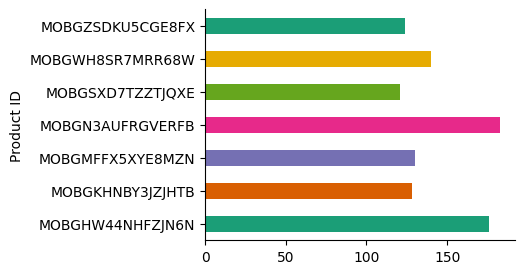

In [56]:
# @title Product ID
plt.figure(figsize=(4, 3))
df.groupby('Product ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Figure size 400x300 with 0 Axes>

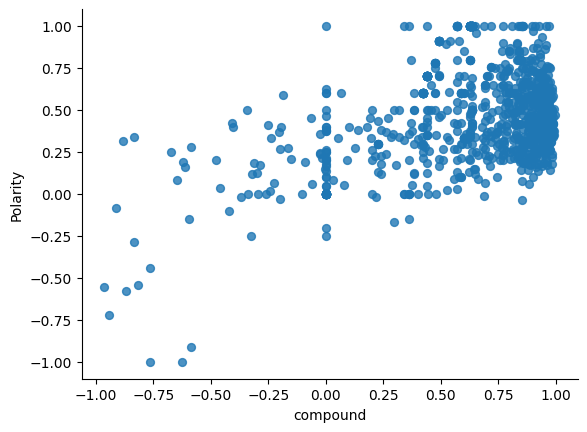

In [57]:
# @title compound vs Polarity

plt.figure(figsize=(4, 3))
df1.plot(kind='scatter', x='compound', y='Polarity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

C:\Users\aravi\AppData\Local\Temp\ipykernel_12380\3997122214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df1, palette='viridis')


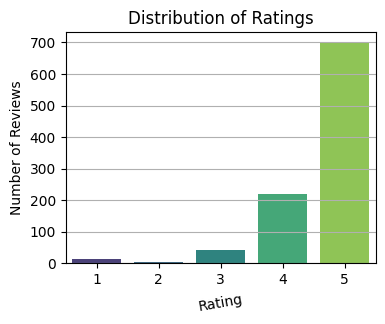

In [58]:
# Plot Rating Distribution
plt.figure(figsize=(4, 3))
sns.countplot(x='Rating', data=df1, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating', rotation=10)
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()

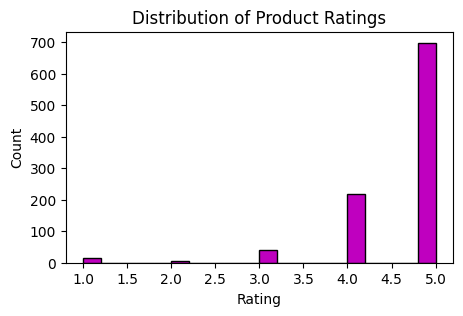

In [59]:
# Plot the distribution of ratings
plt.figure(figsize=(5, 3))
plt.hist(df1['Rating'], bins=20, color='m', edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

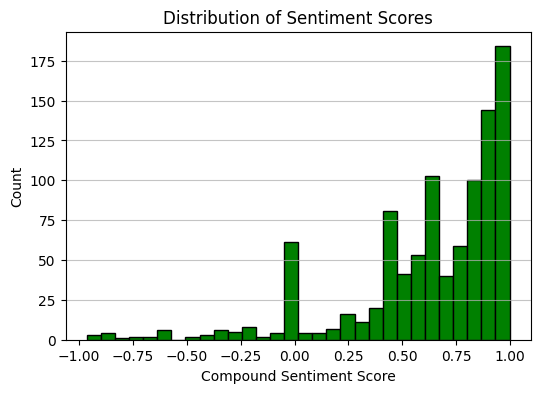

In [60]:
# Create a histogram of the 'compound' sentiment scores
plt.figure(figsize=(6, 4))
plt.hist(df1['compound'], bins=30, color='g', edgecolor='black')
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [61]:
# Visualize the sentiment distribution using Vader Lexicon
import altair as alt

alt.Chart(df1).mark_bar().encode(
    x='vader_lexicon_Sentiment:N',
    y='count()',
    color='vader_lexicon_Sentiment:N'
).properties(
    title="Sentiment Distribution (Vader Lexicon)"
)

alt.Chart(...)

In [62]:
# Visualize the sentiment distribution using TextBlob
alt.Chart(df1).mark_bar().encode(
    x='TextBlob_Sentiment:N',
    y='count()',
    color='TextBlob_Sentiment:N'
).properties(
    title="Sentiment Distribution (TextBlob)"
)

alt.Chart(...)

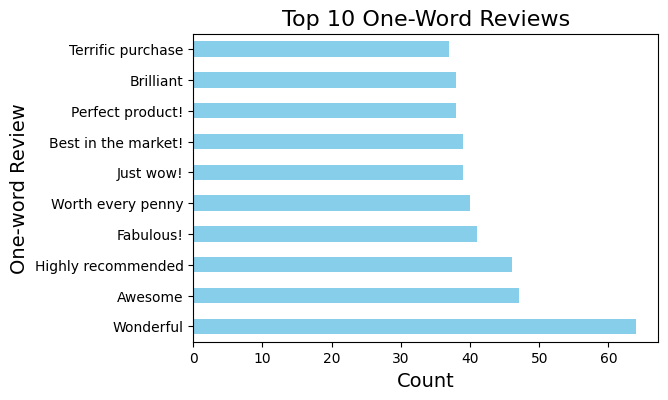

In [63]:
# Calculate the count of each one-word review
top_reviews = df1['One-word Review'].value_counts().head(10)
# Create a bar plot
plt.figure(figsize=(6, 4))
top_reviews.plot(kind='barh', color='skyblue')
# Add titles and labels
plt.title('Top 10 One-Word Reviews', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('One-word Review', fontsize=14)
plt.show()   # Show the plot

C:\Users\aravi\AppData\Local\Temp\ipykernel_12380\1507728977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='compound', data=df1, palette='pastel', order=df1['compound'].value_counts().iloc[:10].index)    # df1['compound'].value_counts().iloc[:10].plot(kind='bar')


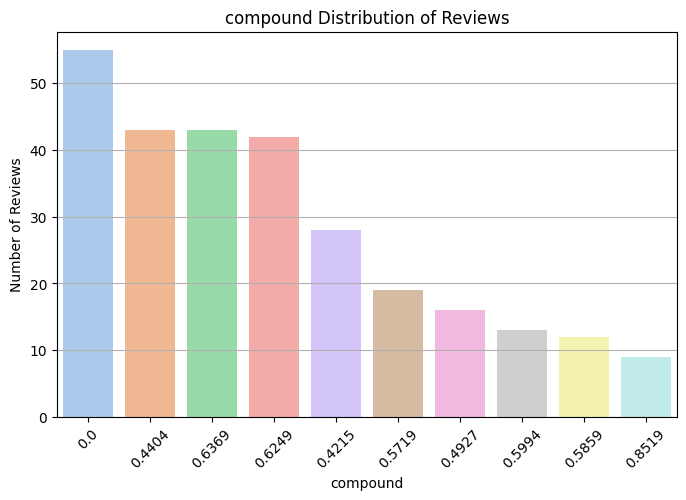

In [64]:
# Visualization of compound Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='compound', data=df1, palette='pastel', order=df1['compound'].value_counts().iloc[:10].index)    # df1['compound'].value_counts().iloc[:10].plot(kind='bar')
plt.title('compound Distribution of Reviews')
plt.xlabel('compound')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

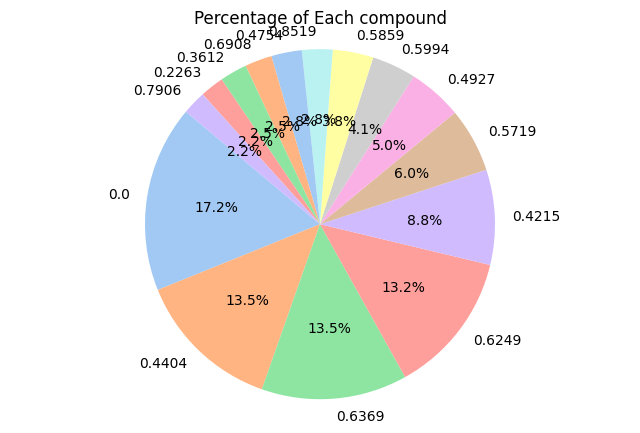

In [65]:
# Additional visualization: Percentage of each compound
compound_counts = df1['compound'].value_counts().iloc[:15]  # Select top 20 compounds
plt.figure(figsize=(8, 5))
plt.pie(compound_counts, labels=compound_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel')) # Remove 'order' parameter
plt.title('Percentage of Each compound')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()

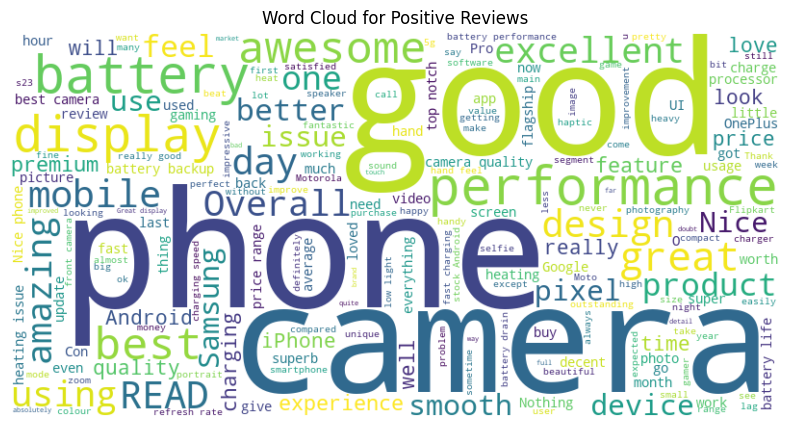

In [66]:
# Word Cloud for Positive Reviews

# Example code for generating a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'Cleaned_Reviews' column contains the text data of positive reviews
positive_reviews = df1[df1['compound'] > 0]['Review'].str.cat(sep=' ')  # Combine all positive reviews into one text

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title('Word Cloud for Positive Reviews')
plt.show()

In [67]:
# # Plot the top 5 recommended products
# plt.figure(figsize=(10, 6))
# sns.barplot(x=recommendation.index, y=recommendation.values, palette='Set2')
# plt.title('Top 5 Recommended Products', fontsize=16)
# plt.xlabel('Phone Name', fontsize=12)
# plt.ylabel('Number of Recommendations', fontsize=12)
# plt.xticks(rotation=45)
# plt.show()



# # Visualize compound distribution
# df1['compound'].value_counts().iloc[:10].plot(kind='bar') # Call plot directly on the Series
# plt.xlabel('compound')
# plt.ylabel('Number of Reviews')
# plt.title('compound Distribution')
# plt.show()

# **5. Product Recommendation [Recommend top products in each category]**

In [68]:
# You can then use this information to suggest products to users or
# understand which products are performing better based on ratings
# and customer sentiment.

In [69]:
# Calculate the average rating for each product
average_rating_per_product = df1.groupby('Product ID')['Rating'].mean()
# Print the results
print("Average Rating per Product:\n", average_rating_per_product)

# Find the top 3 products with the highest average rating
top_3_products_by_rating = average_rating_per_product.nlargest(3)
# Print the results
print("\nTop 3 Products by Average Rating:\n", top_3_products_by_rating)

Average Rating per Product:
 Product ID
MOBGHW44NHFZJN6N    4.668605
MOBGKHNBY3JZJHTB    4.428571
MOBGMFFX5XYE8MZN    4.795276
MOBGN3AUFRGVERFB    4.551136
MOBGSXD7TZZTJQXE    4.798319
MOBGWH8SR7MRR68W    4.601504
MOBGZSDKU5CGE8FX    4.512195
Name: Rating, dtype: float64

Top 3 Products by Average Rating:
 Product ID
MOBGSXD7TZZTJQXE    4.798319
MOBGMFFX5XYE8MZN    4.795276
MOBGHW44NHFZJN6N    4.668605
Name: Rating, dtype: float64


In [70]:
# Calculate the average sentiment score (compound) for each product and  Group by product_id
average_sentiment_per_product = df1.groupby('Product ID')['compound'].mean()
# Print the results
print("\nAverage Sentiment Score per Product:\n", average_sentiment_per_product)

# Find the top 3 products with the highest average sentiment score
top_3_products_by_sentiment = average_sentiment_per_product.nlargest(3)
# Print the results
print("\nTop 3 Products by Average Sentiment Score:\n", top_3_products_by_sentiment)


Average Sentiment Score per Product:
 Product ID
MOBGHW44NHFZJN6N    0.707963
MOBGKHNBY3JZJHTB    0.606999
MOBGMFFX5XYE8MZN    0.683080
MOBGN3AUFRGVERFB    0.530510
MOBGSXD7TZZTJQXE    0.705456
MOBGWH8SR7MRR68W    0.569932
MOBGZSDKU5CGE8FX    0.595364
Name: compound, dtype: float64

Top 3 Products by Average Sentiment Score:
 Product ID
MOBGHW44NHFZJN6N    0.707963
MOBGSXD7TZZTJQXE    0.705456
MOBGMFFX5XYE8MZN    0.683080
Name: compound, dtype: float64


In [71]:
# Count the number of reviews count for each product
review_count_per_product = df.groupby('Product ID')['Review'].count()
# Print the results
print("\nNumber of Reviews per Product:\n", review_count_per_product)


Number of Reviews per Product:
 Product ID
MOBGHW44NHFZJN6N    176
MOBGKHNBY3JZJHTB    128
MOBGMFFX5XYE8MZN    130
MOBGN3AUFRGVERFB    183
MOBGSXD7TZZTJQXE    121
MOBGWH8SR7MRR68W    140
MOBGZSDKU5CGE8FX    124
Name: Review, dtype: int64


In [72]:
# Combine the above information into a single dataframe
Product_analysis = pd.DataFrame({
    'Average_Rating': average_rating_per_product,
    'Average_Sentiment': average_sentiment_per_product,
    'Review_Count': review_count_per_product
})

# Print the results
print("\nProduct Analysis:\n", Product_analysis)


Product Analysis:
                   Average_Rating  Average_Sentiment  Review_Count
Product ID                                                       
MOBGHW44NHFZJN6N        4.668605           0.707963           176
MOBGKHNBY3JZJHTB        4.428571           0.606999           128
MOBGMFFX5XYE8MZN        4.795276           0.683080           130
MOBGN3AUFRGVERFB        4.551136           0.530510           183
MOBGSXD7TZZTJQXE        4.798319           0.705456           121
MOBGWH8SR7MRR68W        4.601504           0.569932           140
MOBGZSDKU5CGE8FX        4.512195           0.595364           124


In [73]:
# You can customize this further to:
# - Consider only products with a certain number of reviews
# - Filter out products with negative sentiment scores
# - Recommend products within specific categories
# - Use a more sophisticated recommendation algorithm (e.g., collaborative filtering)

In [74]:
# Calculate average rating for each product
avg_rating = df.groupby('Product ID').agg(Avg_Rating=('Rating', 'mean'))     #.reset_index()
print("\nAverage rating for each product:\n", avg_rating)

# Get the top 3 products by average rating
top_n = avg_rating.sort_values(by='Avg_Rating', ascending=False).head(3)
print("\nTop 3 products by average rating:\n", top_n)


Average rating for each product:
                   Avg_Rating
Product ID                  
MOBGHW44NHFZJN6N    4.670455
MOBGKHNBY3JZJHTB    4.429688
MOBGMFFX5XYE8MZN    4.800000
MOBGN3AUFRGVERFB    4.562842
MOBGSXD7TZZTJQXE    4.801653
MOBGWH8SR7MRR68W    4.607143
MOBGZSDKU5CGE8FX    4.516129

Top 3 products by average rating:
                   Avg_Rating
Product ID                  
MOBGSXD7TZZTJQXE    4.801653
MOBGMFFX5XYE8MZN    4.800000
MOBGHW44NHFZJN6N    4.670455


In [75]:
# Calculate most_popular for each product
popular_products = pd.DataFrame(df1.groupby('Product ID')['Rating'].count())
print("\nCalculate most_popular for each product:\n", popular_products)

# Get the top 3 most_popular by each product
most_popular = popular_products.sort_values('Rating', ascending=False).head(3)
print("\nTop 3 most_popular:\n", most_popular)


Calculate most_popular for each product:
                   Rating
Product ID              
MOBGHW44NHFZJN6N     172
MOBGKHNBY3JZJHTB     126
MOBGMFFX5XYE8MZN     127
MOBGN3AUFRGVERFB     176
MOBGSXD7TZZTJQXE     119
MOBGWH8SR7MRR68W     133
MOBGZSDKU5CGE8FX     123

Top 3 most_popular:
                   Rating
Product ID              
MOBGN3AUFRGVERFB     176
MOBGHW44NHFZJN6N     172
MOBGWH8SR7MRR68W     133


In [76]:
# Calculate average sentiment for each product
average_sentiment = df1.groupby('Product ID')['compound'].mean()  # Assuming 'Sentiment' is your sentiment score column [average_sentiment_per_product]

# Sort the products by average sentiment score in descending order
top_products = average_sentiment.sort_values(ascending=False)    #use average_sentiment_per_product

# Top products as recommendations
print("\nTop Product Recommendations based on Sentiment:\n", top_products)


Top Product Recommendations based on Sentiment:
 Product ID
MOBGHW44NHFZJN6N    0.707963
MOBGSXD7TZZTJQXE    0.705456
MOBGMFFX5XYE8MZN    0.683080
MOBGKHNBY3JZJHTB    0.606999
MOBGZSDKU5CGE8FX    0.595364
MOBGWH8SR7MRR68W    0.569932
MOBGN3AUFRGVERFB    0.530510
Name: compound, dtype: float64


# **6. Implementing LangChain for Product Recommendations [LLM]**

In [77]:
import torch 
print(torch.__version__)

2.4.1+cpu


In [78]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [79]:
from langchain.llms import HuggingFacePipeline
from transformers import pipeline

d:\I-P\Data_Science\Project\Flipkart\Flipkart_recommendation_using_mobile_review\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 6.1 **LLM**

In [90]:
from langchain import PromptTemplate
from langchain.llms import HuggingFacePipeline
from transformers import pipeline

# Set your Hugging Face API key
HUGGING_FACE_API_KEY = "*********************"  

# Load your dataset
df1 = pd.read_csv("Flipkart_cleaned_mobile_data_reviews_with_textblob_sentiment_analysis.csv")

# Initialize the Hugging Face pipeline for sentiment analysis
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    tokenizer="distilbert-base-uncased-finetuned-sst-2-english",
    device=-1 ) # Use -1 for CPU

# Define a function to analyze sentiment
def analyze_sentiment(row):
    result = sentiment_pipeline(row['Review'])
    sentiment = result[0]['label']  # Get the sentiment label
    scores = result[0]['score']       # Get the confidence score
    return pd.Series([sentiment, scores])  # Return both sentiment and score

# Apply the sentiment analysis function to the DataFrame
df1[['predicted_sentiment', 'compound']] = df1.apply(analyze_sentiment, axis=1)

# Define a function to generate product recommendations
def generate_recommendation(row):
    if row['compound'] >= 0.7:
        return f"Highly recommend {row['Product Name']}! Users love it for its {row['Review'][:50]}..."
    elif row['compound'] >= 0.4:
        return f"Consider {row['Product Name']} if you're looking for a solid option. Users say: {row['Review'][:50]}..."
    else:
        return f"You might want to research more before choosing {row['Product Name']}. Some users mentioned: {row['Review'][:50]}..."

# Apply the recommendation function to the DataFrame
df1['recommendation'] = df1.apply(generate_recommendation, axis=1)

In [91]:
# Save results Optionally, save the DataFrame to a CSV file.
df1.to_csv('flipkart_reviews_llm.csv', index=False)
print("LLM analysis completed and saved.")

LLM analysis completed and saved.


In [92]:
df1.head

<bound method NDFrame.head of                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Review  \
0                                                                                                                                                                                                                                                    Reviewing after one month use Nice and handy phone with 6.4 display Compact size. Camera  is mind blowing  Battery life is ok Display is amazing with victous glass protection which is best in market For nor

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Review                   976 non-null    object 
 1   Rating                   976 non-null    int64  
 2   One-word Review          976 non-null    object 
 3   Product Name             976 non-null    object 
 4   Product ID               976 non-null    object 
 5   Sentiment_Score          976 non-null    object 
 6   compound                 976 non-null    float64
 7   vader_lexicon_Sentiment  976 non-null    object 
 8   Polarity                 976 non-null    float64
 9   TextBlob_Sentiment       976 non-null    object 
 10  predicted_sentiment      976 non-null    object 
 11  recommendation           976 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 91.6+ KB


In [99]:
from langchain import PromptTemplate

# Load the dataset that already contains textblob and compound_sentiment
df1 = pd.read_csv("flipkart_reviews_llm.csv")

# Aggregate data by Product Name, calculating the average compound score and sentiment count
most_recommended_mobile_phone = df1.groupby('Product Name').agg(
    average_compound_score=('compound', 'mean'),
    average_compound_sentiment=('TextBlob_Sentiment', 'count')  # Adjusting sentiment count for simplicity
).reset_index()

# Sort by average compound score in descending order and select the top phone
most_recommended_mobile_phone = most_recommended_mobile_phone.sort_values(
    by=['average_compound_score'],  # Sorting by average sentiment score
    ascending=False
).head(1)  # Get the top 1 mobile phone

# Define the LangChain template for recommendation
template = """
Based on sentiment analysis, we recommend the following mobile phone:

**Model**: {mobile}
- Average Sentiment Score: {average_compound_score:.2f}
- Positive Sentiment Count: {average_compound_sentiment}

This mobile is highly recommended by users for its excellent features and performance!
"""

# Create a PromptTemplate in LangChain
recommendation_template = PromptTemplate.from_template(template)

# Generate recommendations for the top phone
for _, row in most_recommended_mobile_phone.iterrows():
    prompt = recommendation_template.format(
        mobile=row['Product Name'],  # Changed to 'Product Name' from the dataframe
        average_compound_score=row['average_compound_score'],
        average_compound_sentiment=row['average_compound_sentiment']
    )
    print(prompt)


Based on sentiment analysis, we recommend the following mobile phone:

**Model**: OnePlus 11R
- Average Sentiment Score: 0.99
- Positive Sentiment Count: 176

This mobile is highly recommended by users for its excellent features and performance!



In [100]:
most_recommended_mobile_phone.to_pickle('most_recommended_mobile_phones.pkl')

In [101]:
ri = pd.read_pickle('most_recommended_mobile_phones.pkl')
ri
# key, OpenAI, pandasai - pandasai_key, from pandasai import SmartDataframe as sdf, sdf=SmartDataframe(df), chat

,Product Name,average_compound_score,average_compound_sentiment
3,OnePlus 11R,0.991875,176


## **6.2 Graph**

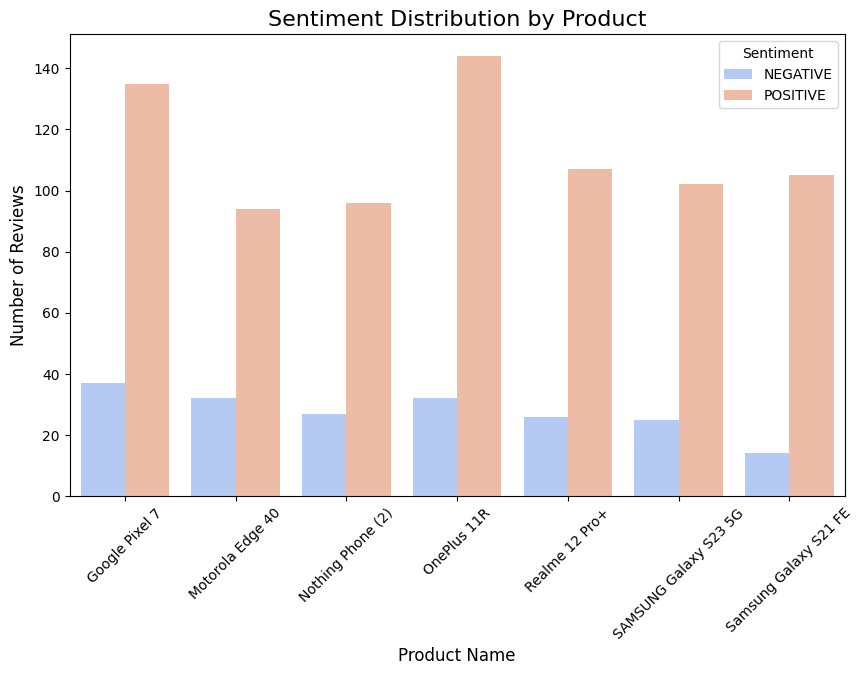

In [102]:
plt.figure(figsize=(10, 6))
# Group by 'Product Name' and 'predicted_sentiment' (which represents sentiment)
sentiment_by_product = df1.groupby(['Product Name', 'predicted_sentiment']).size().reset_index(name='count')
# Create the barplot using 'Product Name' for the x-axis and 'count' for y-axis
sns.barplot(x='Product Name', y='count', hue='predicted_sentiment', data=sentiment_by_product, palette='coolwarm')
# Adding title and labels
plt.title('Sentiment Distribution by Product', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45) # Rotate the x-axis labels for better readability
plt.legend(title='Sentiment') # Add legend for sentiment
plt.show()  # Display the plot

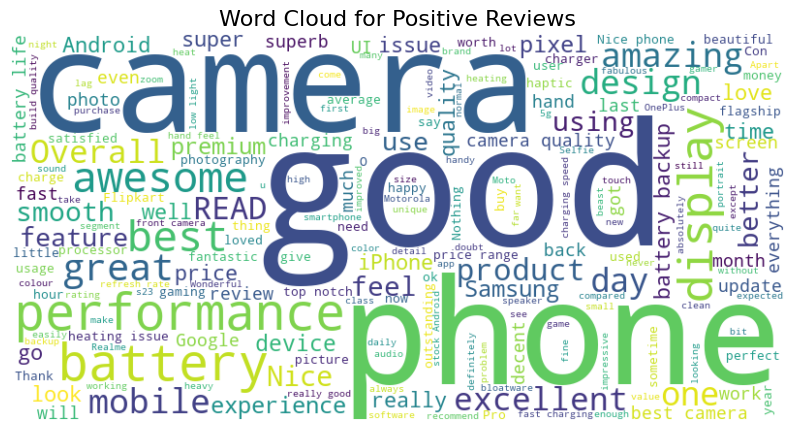

In [103]:
# Word Cloud for Positive Reviews
from wordcloud import WordCloud
positive_reviews = ' '.join(df1[df1['predicted_sentiment'] == 'POSITIVE']['Review'].tolist())  # Combine all positive reviews
# Generate the word cloud for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews', fontsize=16)
plt.axis('off')
plt.show()

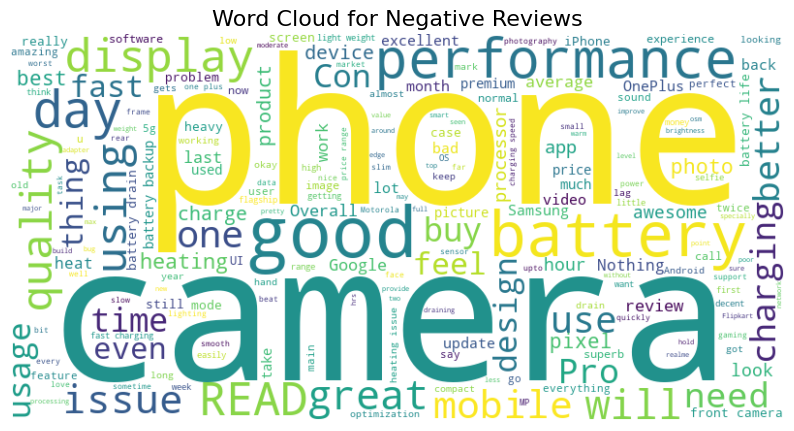

In [104]:
# Word Cloud for Negative Reviews (if you have negative sentiment data)
negative_reviews = ' '.join(df1[df1['predicted_sentiment'] == 'NEGATIVE']['Review'].tolist())

# Generate the word cloud for negative reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews', fontsize=16)
plt.axis('off')
plt.show()

# **7. AWS [World wide anyone can use this URL]**

In [106]:
# AWS deployed